In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate,train_test_split,GridSearchCV

In [33]:
#Creamos nuestra base de datos
moons=make_moons(n_samples=10_000, noise=0.4, random_state=25)

In [34]:
#Definimos nuestro vector X y y
X,y=moons

In [35]:
y.shape

(10000,)

In [36]:
#Elegimos nuestro Train y Test set utilizando train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=25)

In [37]:
y_train.shape

(8000,)

In [43]:
#Definimos los hiperparametros sobre los que buscara el mas optimo para nuestro arbol y utilizamos GridSearchCV
#para encontrar el mejor, GridSearchCV utiliza cross-validation
params = {'max_leaf_nodes': list(range(2,100)), 'min_samples_split': [2,3,4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=25), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    6.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=25,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,


In [44]:
#Nos regresa los parametros del mejor estimador para nuestro arbol
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=32,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=25, splitter='best')

In [45]:
#Creamos nuestra grafica en un archivo dot. Fue necesario instalas graphviz desde la consola 
#para que cargara toda la informacion
from sklearn.tree import export_graphviz
export_graphviz( 
 grid_search_cv.best_estimator_,
 out_file=("moons_tree.dot"),
 feature_names=None,
 class_names=None,
 filled=True,
)

In [47]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


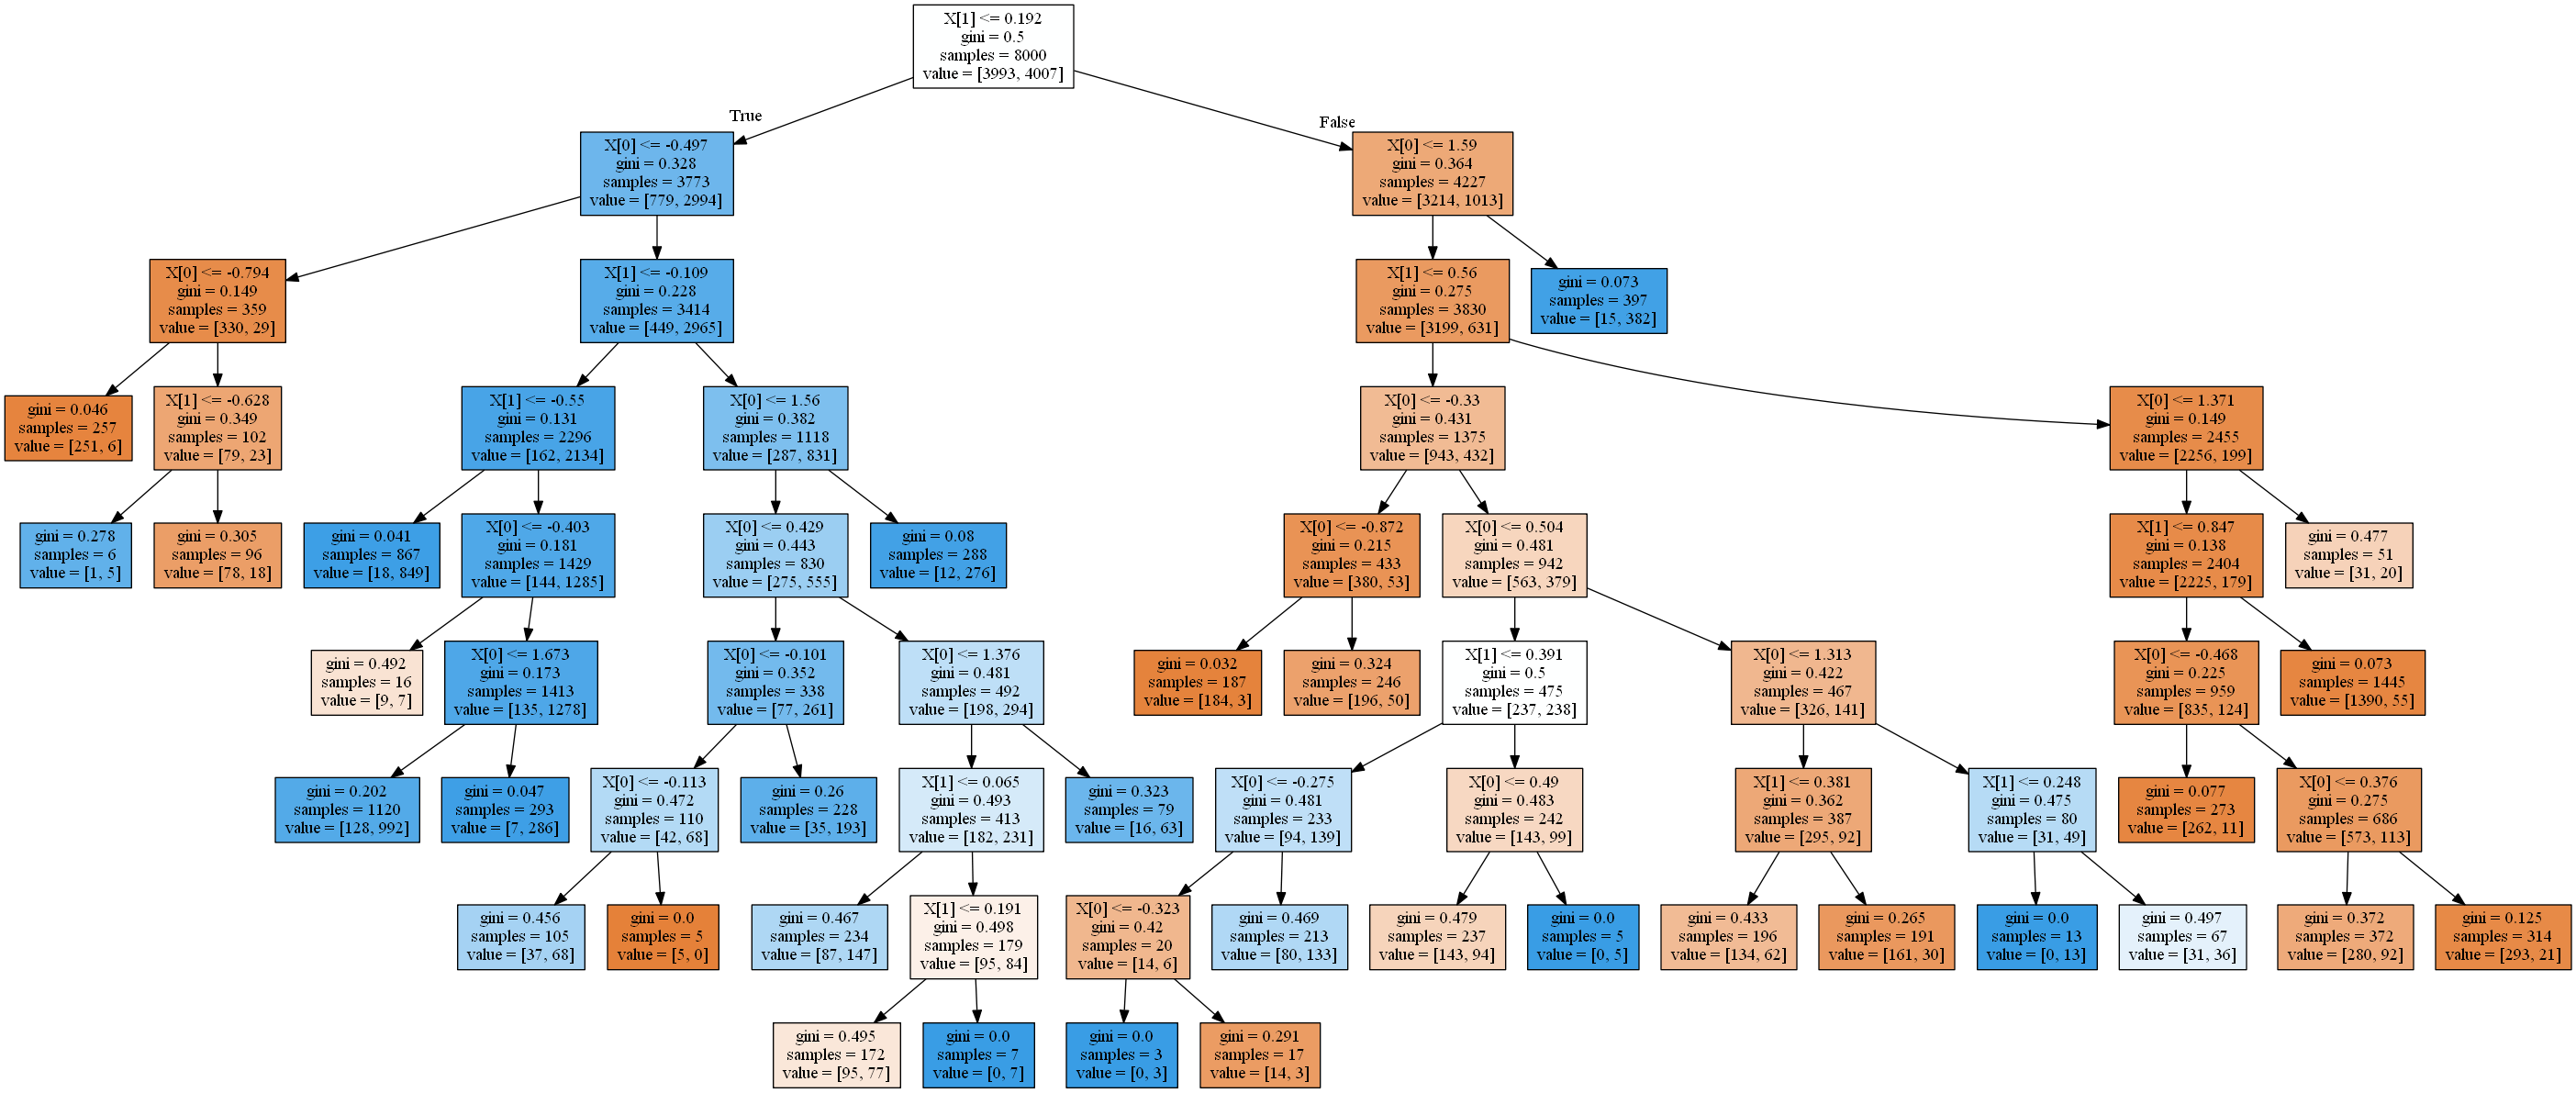

In [46]:
#Con pydot leemos el archivo dot y luego con Image lo mostramos
import pydot
(graph,) = pydot.graph_from_dot_file('moons_tree.dot')
from IPython.display import Image  
Image(graph.create_png())

In [47]:
#Evaluamos que tan acertado es nuestro modelo entrenado 
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.852